In [1]:
import sys

sys.path.append("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, m_e, eV, epsilon_0, e, physical_constants
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh, eig
import src.fem_1d_eigen
import importlib
from src.fem_1d_eigen import *

importlib.reload(src.fem_1d_eigen)

<module 'src.fem_1d_eigen' from '/home/yamamoto/physics/fem/fem_schrodinger/examples/../src/fem_1d_eigen.py'>

In [76]:
xs = np.linspace(-1e-8, 1e-8, 100)
omega = 1e14
v = 1 / 2 * m_e * omega**2 * xs**2
femeig = Fem1dEigen(xs, v)
K = femeig.get_K()
M = femeig.get_M()
V = femeig.get_V()
K_dirichlet = K[1:-1, 1:-1]
M_dirichlet = M[1:-1, 1:-1]
V_dirichlet = V[1:-1, 1:-1]
k = 3
C0 = hbar**2 / (m_e)
C1 = e**2 / (4 * np.pi * epsilon_0)
val, vec = eigsh(
    -1 / 2 * C0 * K_dirichlet + V_dirichlet,
    k=k,
    M=M_dirichlet,
    which="LA",
    sigma=0,
)

# val, vec = eigh(
#  K_dirichlet + V_dirichlet,
#  M_dirichlet,
# )

In [80]:
val / (hbar * omega), vec

(array([0.50403704, 1.50842431, 2.51717445]),
 array([[ 2.01647045e-13,  2.43188177e-13, -1.54749483e-12],
        [ 2.96931081e-13,  5.64343452e-13, -1.16003063e-12],
        [ 1.70186756e-13,  1.25800935e-12,  6.24841043e-12],
        [ 3.33273564e-13,  4.67391371e-12,  4.53841213e-11],
        [ 1.98417832e-12,  2.67711580e-11,  2.64391590e-10],
        [ 1.08186993e-11,  1.49291757e-10,  1.44250360e-09],
        [ 5.91000982e-11,  7.94212036e-10,  7.44659981e-09],
        [ 3.09526670e-10,  4.02532772e-09,  3.64916700e-08],
        [ 1.54325664e-09,  1.94030247e-08,  1.69972520e-07],
        [ 7.33044594e-09,  8.90462008e-08,  7.53461440e-07],
        [ 3.31845878e-08,  3.89391862e-07,  3.18175533e-06],
        [ 1.43300422e-07,  1.62392247e-06,  1.28102158e-05],
        [ 5.90812586e-07,  6.46408347e-06,  4.92103922e-05],
        [ 2.32755546e-06,  2.45776713e-05,  1.80496047e-04],
        [ 8.76859014e-06,  8.93244637e-05,  6.32503679e-04],
        [ 3.16117104e-05,  3.10510713e-

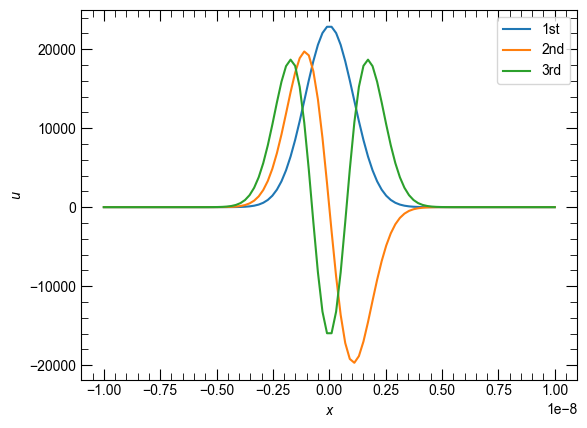

In [79]:
vec_0 = np.insert(vec, 0, 0, axis=0)
vec_0_m1 = np.insert(vec_0, vec_0.shape[0], 0, axis=0)
fig, ax = plt.subplots()
ax.plot(xs, vec_0_m1[:, 0], label="1st")
ax.plot(xs, vec_0_m1[:, 1], label="2nd")
ax.plot(xs, vec_0_m1[:, 2], label="3rd")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$u$")
fig.savefig("eigenfunction.pdf")

In [91]:
vals = []
part1 = np.arange(10, 100, 10)
part2 = np.arange(100, 1000, 100)
combined = np.concatenate((part1, part2))
for i in combined:
    print(i)
    xs = np.linspace(-1e-8, 1e-8, i)
    v = 1 / 2 * m_e * omega**2 * xs**2
    femeig = Fem1dEigen(xs, v)
    K = femeig.get_K()
    M = femeig.get_M()
    V = femeig.get_V()
    K_dirichlet = K[1:-1, 1:-1]
    M_dirichlet = M[1:-1, 1:-1]
    V_dirichlet = V[1:-1, 1:-1]
    val, vec = eigsh(
        -1 / 2 * C0 * K_dirichlet + V_dirichlet,
        k=1,
        M=M_dirichlet,
        which="LA",
        sigma=0,
    )
    vals.append(val)

10
20
30
40
50
60
70
80
90
100
200
300
400
500
600
700
800
900


[1.]


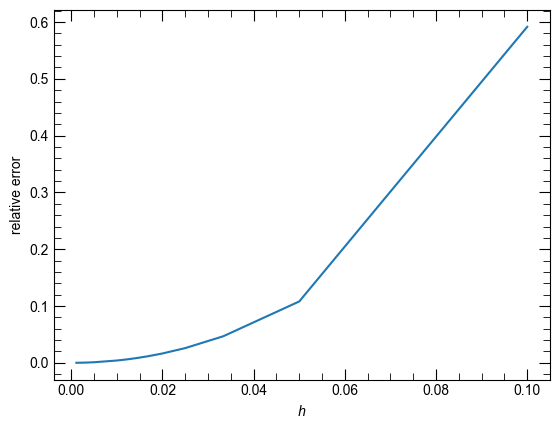

In [92]:
fig, ax = plt.subplots()
ax.plot(1 / combined, np.abs(1 / 2 - (np.array(vals) / (hbar * omega))))
ax.set_xlabel("$h$")
ax.set_ylabel("relative error")
print((np.pi**2 - vals[-1]) / (np.pi**2))
fig.savefig("convergence.pdf")

In [93]:
h = 1/np.array([100, 500, 1000, 5000])
err = 0.5 - np.array([0.496368, 0.499845, 0.499962, 0.499998])

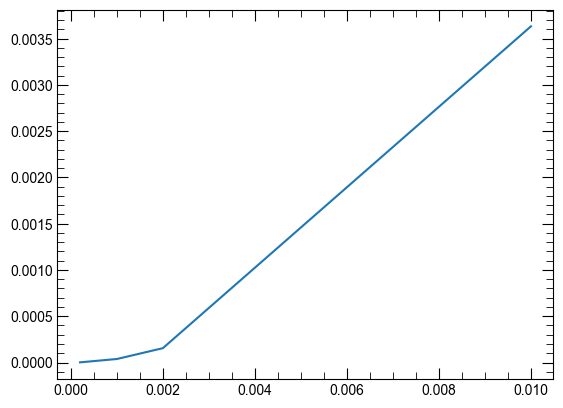

In [94]:
fig, ax = plt.subplots()
ax.plot(h, err)